# DeepSparse + EfficientNet

This example demonstrates how to use DeepSparse to run a model trained with SparseML and exported to ONNX.

Make sure you have DeepSparse installed:

```bash
pip install deepsparse
```

In [ ]:
!pip install deepsparse-nightly

## Benchmarking

DeepSparse has a friendly benchmarking utility that enables you to quickly experiment with throughput and latency of your model. Run `deepsparse.benchmark --help` to see the full list of scenarios.

In [ ]:
!deepsparse.benchmark ./efficientnet-models-flowers/b2-quant-model.onnx -b 1 -ncores 4

## Usage

DeepSparse offers three inference APIs.

- `engine` is the lowest level API. We pass raw tensors and recieve the result of the model. All pre-processing (like normalization) is handled by the user.

- `pipeline` handles pre-processing and postprocessing. We can pass either image files or numpy arrays. Pre-processing (like reformatting the shape, and normalization) is handled by the pipeline.

- `server` is a REST API around `pipeline`.

Here's and example of `engine` and `pipeline`:

## Engine

Run inference on raw tensors, get back full vector of logits.

In [8]:
from deepsparse import Engine
from deepsparse.utils import generate_random_inputs, model_to_path
import numpy as np

path = "./efficientnet-models-flowers/b2-quant-model.onnx"
batch_size = 1
num_cores = 4

engine = Engine(
    model=path,
    batch_size=batch_size,
    num_cores=num_cores
)

In [9]:
# input is raw numpy tensors, output is raw scores for classes
inputs = generate_random_inputs(model_to_path(path), batch_size)
output = engine(inputs)
print(inputs[0].shape)
print(output[0].shape)

2023-04-25 13:17:58 deepsparse.utils.onnx INFO     Generating input 'input', type = float32, shape = [1, 3, 288, 288]


(1, 3, 288, 288)
(1, 102)


## Pipeline

Run inference on unprocessed images, get back post-processed results.

In [10]:
from deepsparse import Pipeline

#### Compile

In [11]:
# download onnx from sparsezoo and compile with batch size 1
path = "./efficientnet-models-flowers/b2-quant-model.onnx"
batch_size = 1
num_cores = 4
pipeline = Pipeline.create(
    task="image_classification",
    model_path=path,
    batch_size = batch_size,
    num_cores=num_cores
)

#### Run Inference - Passing a JPEG

In [27]:
# pipeline handles reading from disk and runnning inference
image_path = "/home/ubuntu/rshaw/customer-examples/verizon/ic-example/efficientnet/data/flowers-102/jpg/image_00001.jpg"
prediction = pipeline(images=[image_path])
print(prediction.labels)

[76]


#### Run Inference - Passing a Numpy array

In [28]:
# pass a numpy array
from PIL import Image
import numpy as np

im = Image.open(image_path)
im_np = np.asarray(im)
print(im_np.shape)

# pipeline handles reshaping to 288x288
prediction = pipeline(images=[im_np])
print(prediction.labels)

(500, 591, 3)
[76]


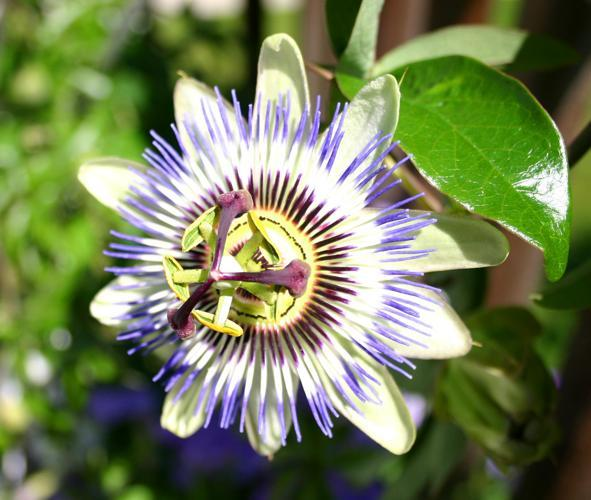

In [29]:
im